#Problem Statement:

The Income Classification Machine Learning models classifies if the annual income of an individual is below or equal to 50,000 USD or above 50,000 USD.

Basis the model metrics we select the best performing model for our problem.

#Import Libraries

In [94]:
! pip install --upgrade joblib scikit-learn pyzmq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.4/862.4 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 24.0.1
    Uninstalling pyzmq-24.0.1:
      Successfully uninstalled pyzmq-24.0.1


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Model Metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Save Model

import pickle

#Load Dataset

In [24]:
income_census = pd.read_csv('/content/adultcensusincome.csv')
income_census

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


# Exploratory Data Analysis

In [25]:
income_census.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
sex,0
capital.gain,0


-

In [26]:
income_census.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 17.9 MB


# Data imputation
- Replace ? with Unknown

In [27]:
income_census['workclass'] = income_census['workclass'].replace('?', 'Unknown')
income_census['occupation'] = income_census['occupation'].replace('?', 'Unknown')
income_census['native-country'] = income_census['native.country'].replace('?', 'Unknown')
income_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native-country
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,<=50K,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K,United-States
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,<=50K,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K,United-States


# Univariate Analysis

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


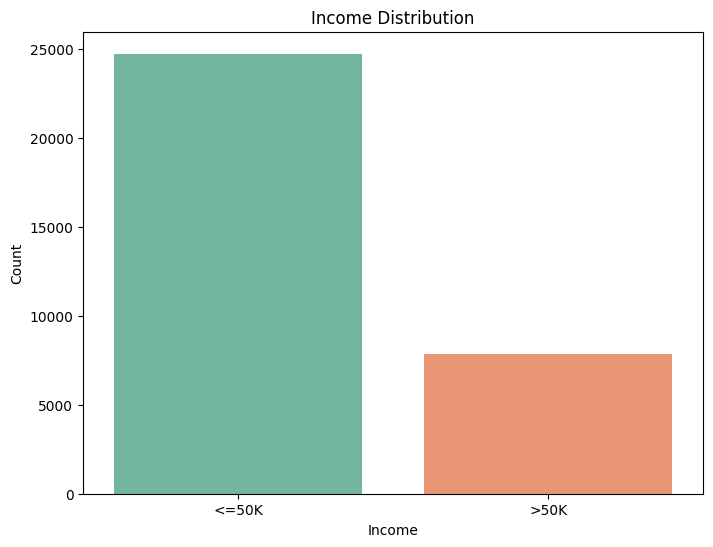

In [28]:
# Income Distribution

income_distribution = income_census['income'].value_counts()
print(f"{income_distribution}")

# Plot the income distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=income_census, hue='income', palette='Set2')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

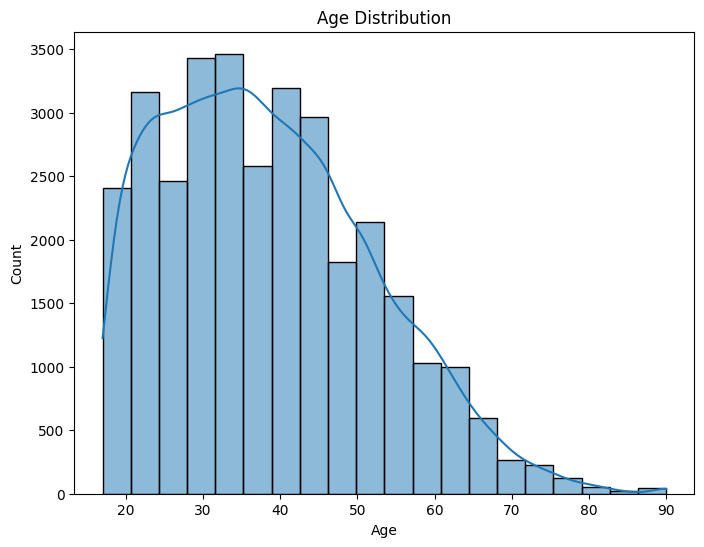

In [29]:
# Age Distribution

plt.figure(figsize=(8, 6))
sns.histplot(income_census['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

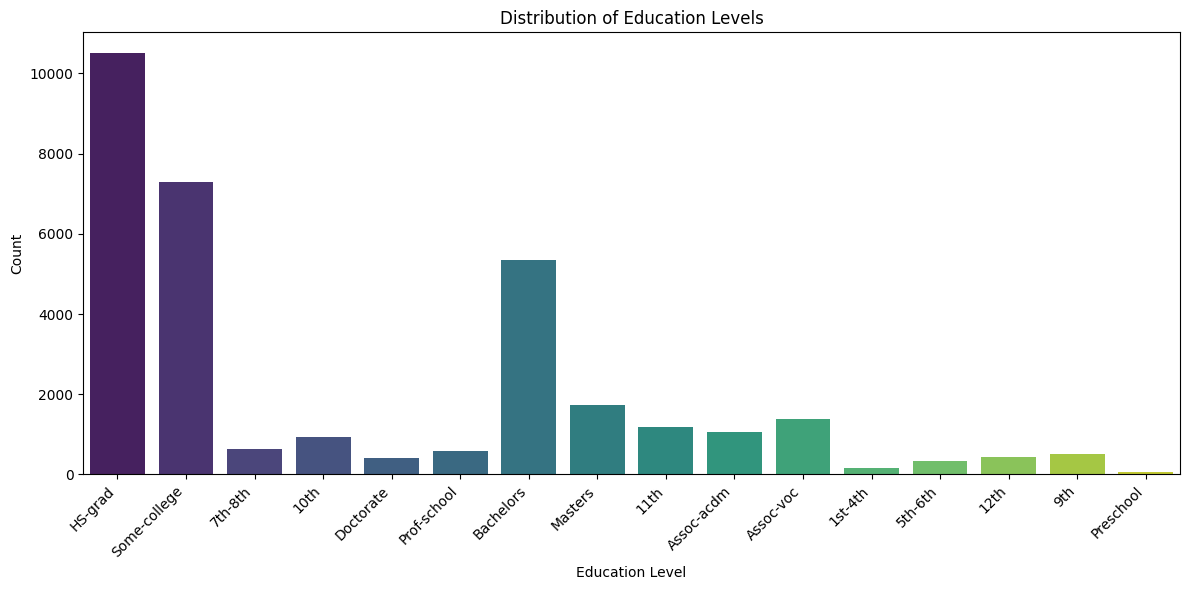

In [30]:
# Education Levels

plt.figure(figsize=(12, 6))
sns.countplot(data=income_census, x='education', palette='viridis')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

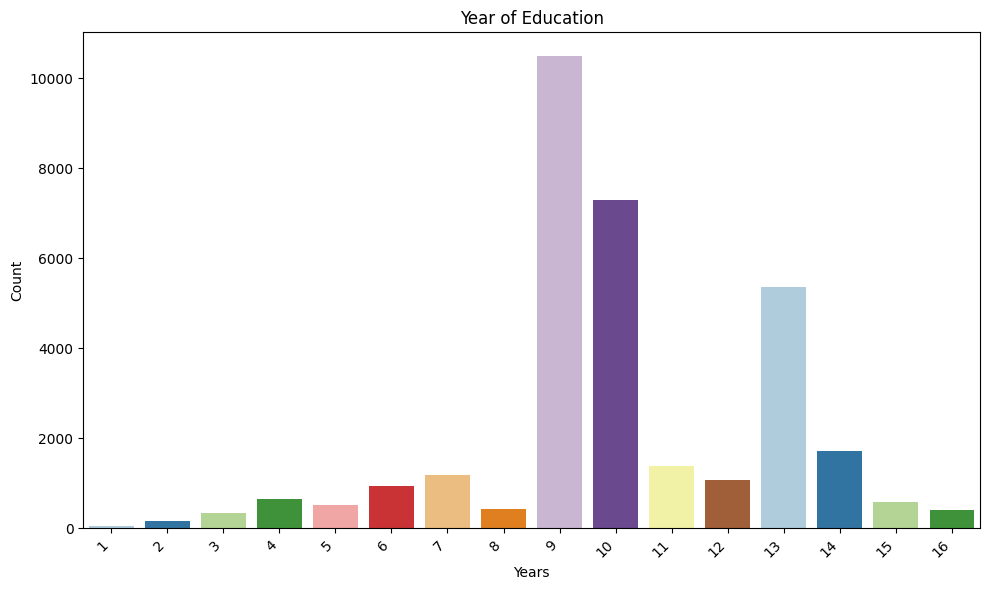

In [31]:
# Years of Education

plt.figure(figsize=(10, 6))
sns.countplot(data=income_census, x='education.num', palette='Paired')
plt.title('Year of Education')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

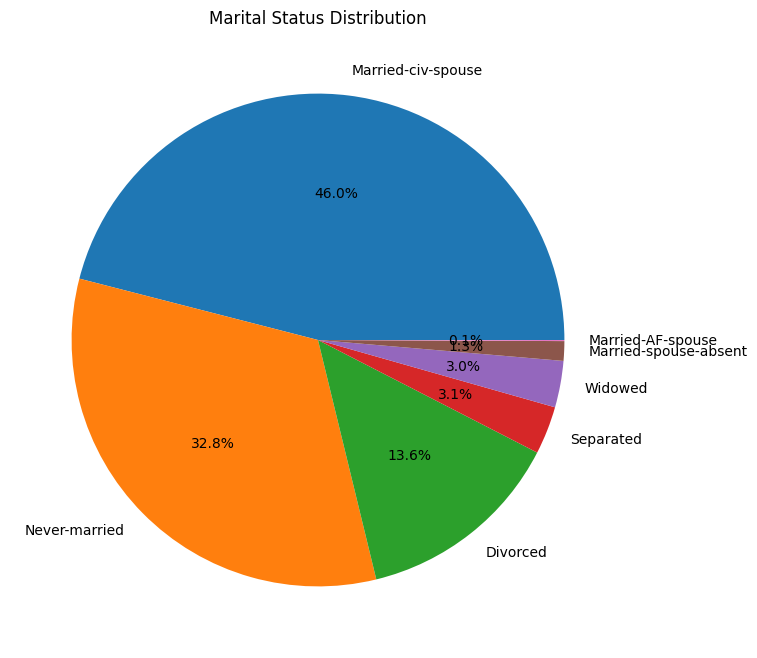

In [32]:
# Marital Status Pie Chart

plt.figure(figsize=(8, 8))
plt.pie(income_census['marital.status'].value_counts(), labels=income_census['marital.status'].value_counts().index, autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()

# Perform the following Bivariate analysis

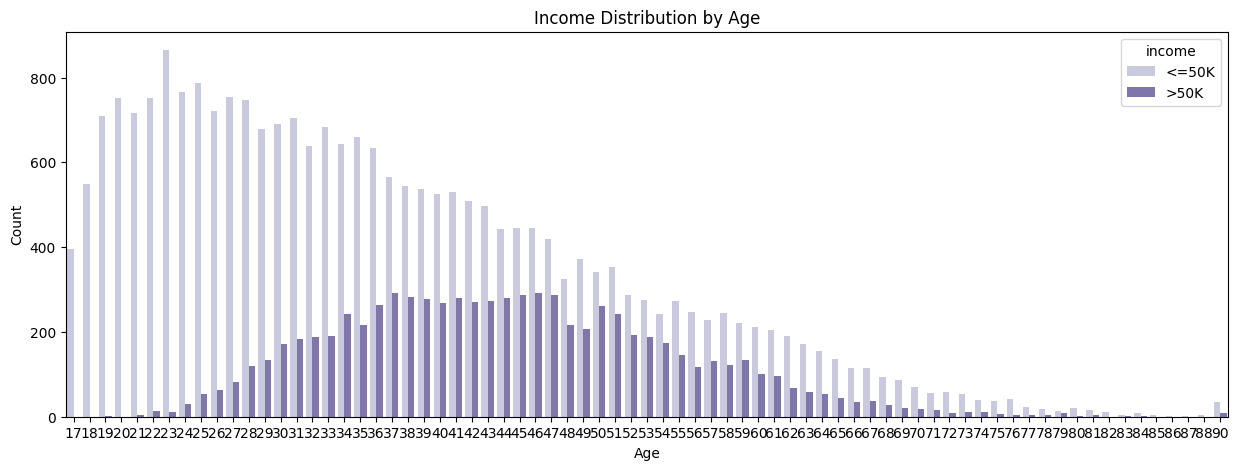

In [33]:
# Create a countplot of income across columns age

plt.figure(figsize=(15, 5))
sns.countplot(data=income_census, x='age', hue='income', palette='Purples')
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

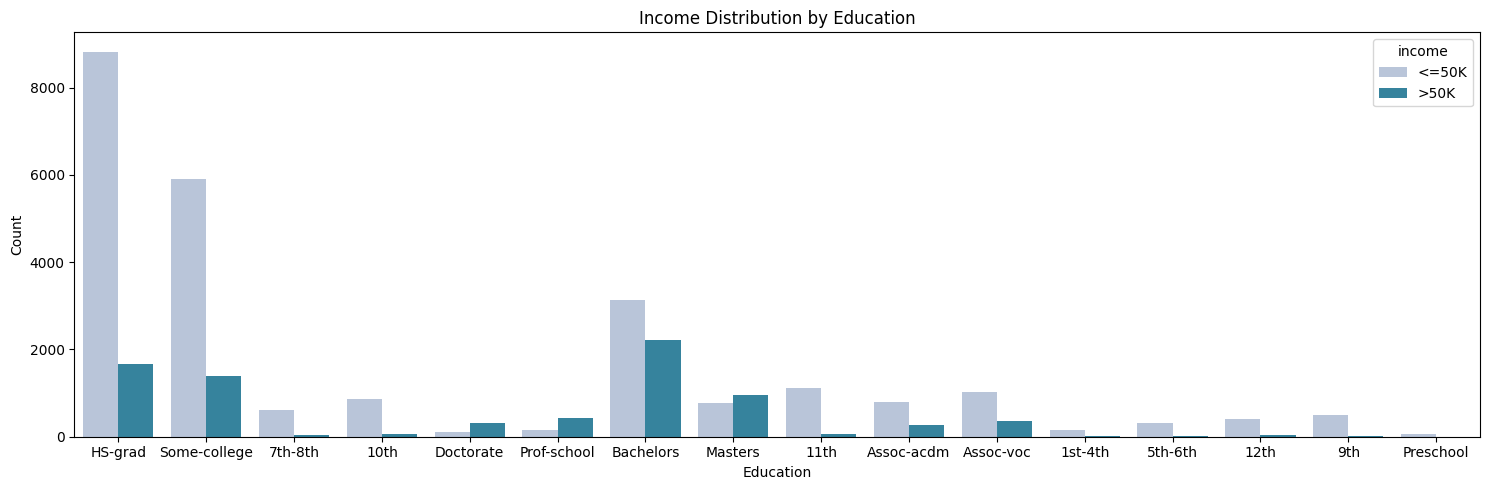

In [34]:
# Create a countplot of income across column education

plt.figure(figsize=(15, 5))
sns.countplot(data=income_census, x='education', hue='income', palette="PuBuGn")
plt.title('Income Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

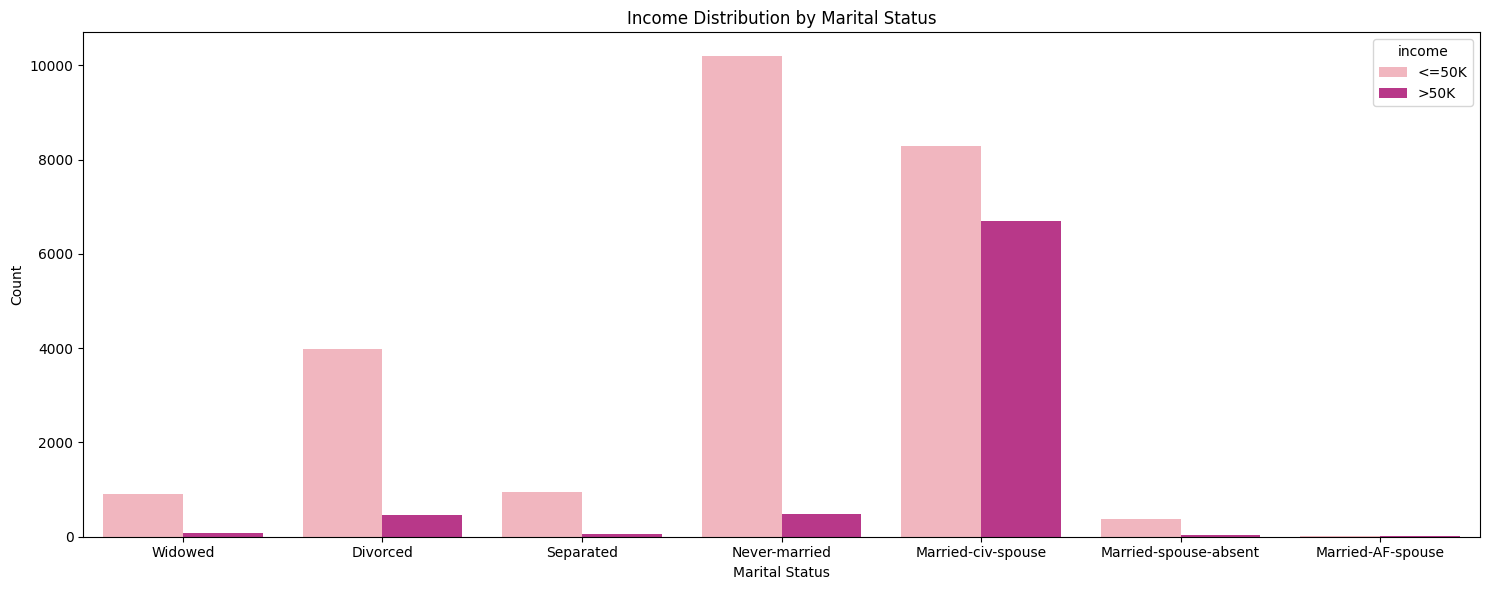

In [35]:
# Create a countplot of income across column marital status

plt.figure(figsize=(15, 6))
sns.countplot(data=income_census, x='marital.status', hue='income', palette="RdPu")
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

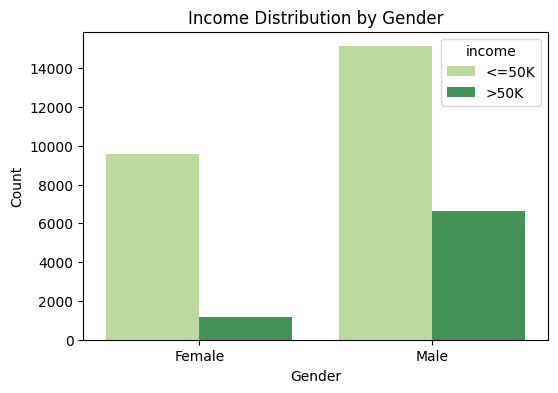

In [36]:
# Create a countplot of income across column sex

plt.figure(figsize=(6, 4))
sns.countplot(data=income_census, x='sex', hue='income', palette="YlGn")
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Prepare the dataset for modeling

In [37]:
income_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native-country
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,<=50K,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K,United-States
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,<=50K,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K,United-States


In [38]:
# Convert the categorical data

le = LabelEncoder()

income_census['workclass'] = le.fit_transform(income_census['workclass']).astype(int)
income_census['education'] = le.fit_transform(income_census['education']).astype(int)
income_census['marital.status'] = le.fit_transform(income_census['marital.status']).astype(int)
income_census['occupation'] = le.fit_transform(income_census['occupation']).astype(int)
income_census['relationship'] = le.fit_transform(income_census['relationship']).astype(int)
income_census['native.country'] = le.fit_transform(income_census['native.country']).astype(int)

income_census = income_census.drop('native-country', axis=1)

# One hot encode the gender

income_census = pd.get_dummies(income_census, columns=['sex'], prefix='gender')

In [39]:
income_census['income_one_hot'] = income_census['income'].replace({'<=50K': 0, '>50K': 1})

In [40]:
income_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income,gender_Female,gender_Male,income_one_hot
0,90,7,77053,11,9,6,14,1,0,4356,40,39,<=50K,True,False,0
1,82,3,132870,11,9,6,3,1,0,4356,18,39,<=50K,True,False,0
2,66,7,186061,15,10,6,14,4,0,4356,40,39,<=50K,True,False,0
3,54,3,140359,5,4,0,6,4,0,3900,40,39,<=50K,True,False,0
4,41,3,264663,15,10,5,9,3,0,3900,40,39,<=50K,True,False,0


# Correlation Heatmap

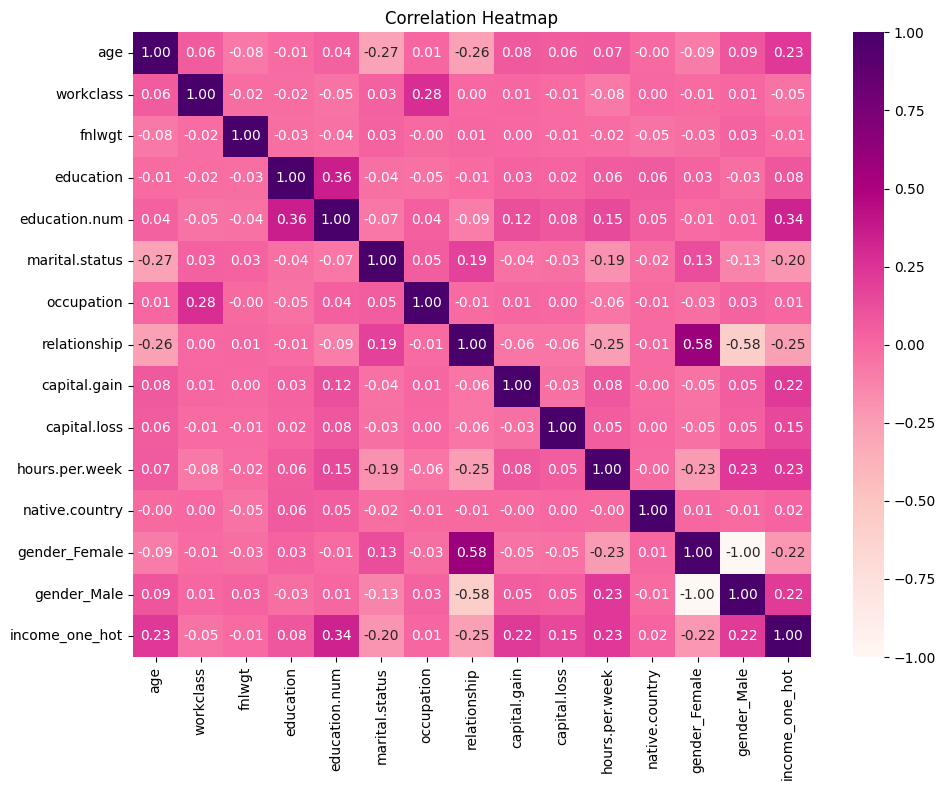

In [41]:
corr_df = income_census.drop(['income'], axis=1)  # Drop the 'string income' column

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='RdPu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# Data Splitting

In [42]:
X = income_census.drop(['income', 'income_one_hot'], axis=1)
y = income_census['income_one_hot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of the X_train {X_train.shape}")
print(f"Shape of the X_test {X_test.shape}")
print(f"Shape of the y_train {y_train.shape}")
print(f"Shape of the y_test {y_test.shape}")

Shape of the X_train (26048, 14)
Shape of the X_test (6513, 14)
Shape of the y_train (26048,)
Shape of the y_test (6513,)


#Fix the imbalance in the dataset using any one of the techniques like SMOTE

In [43]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Feature Scaling

In [44]:
scaler = StandardScaler()

# Scale the X dataset

X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Data Modelling

- Logistic Regression

In [45]:
# Initialise the algorithm

log_reg = LogisticRegression()

# Fit the training data

log_reg.fit(X_train_scaled, y_train_smote)

# Check the training and testing accuracy

train_log_reg_accuracy = log_reg.score(X_train_scaled, y_train_smote)
test_log_reg_accuracy = log_reg.score(X_test_scaled, y_test)

print(f"Logistic Regression Training Accuracy: {train_log_reg_accuracy:.2f}")
print(f"Logistic Regression Testing Accuracy: {test_log_reg_accuracy:.2f}")

Logistic Regression Training Accuracy: 0.82
Logistic Regression Testing Accuracy: 0.79


In [46]:
# Predict the Test Data

y_pred_log = log_reg.predict(X_test_scaled)

# Precision, Recall and F1 Score
print("\tClassification Report for Logistic Regression")
print("-"*60)
print(classification_report(y_test, y_pred_log))

# Predict Probabilties

y_pred_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

	Classification Report for Logistic Regression
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4976
           1       0.54      0.72      0.62      1537

    accuracy                           0.79      6513
   macro avg       0.72      0.77      0.74      6513
weighted avg       0.82      0.79      0.80      6513



In [47]:
# Cross Validation

cv_scores_log = cross_val_score(log_reg, X_train_scaled, y_train_smote, cv=5)
print(f"Cross Validation Scores for Logistic Regression : {cv_scores_log}")
print(f"Mean Cross Validation Score for Logistic Regression : {np.mean(cv_scores_log):.2f}")

Cross Validation Scores for Logistic Regression : [0.77323373 0.79956951 0.83818688 0.8365202  0.83424085]
Mean Cross Validation Score for Logistic Regression : 0.82


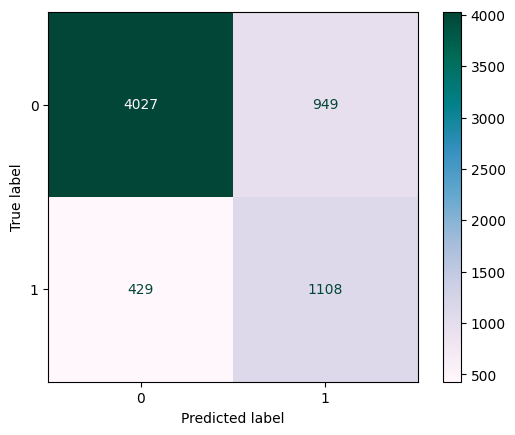

In [48]:
# Confusion Matrix

cm_log = confusion_matrix(y_test, y_pred_log)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_reg.classes_)
disp.plot(cmap='PuBuGn')
plt.show()

In [49]:
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Accuracy Score : {accuracy_log:.2f}")
print(f"Precision Score: {precision_log:.2f}")
print(f"Recall: {recall_log:.2f}")
print(f"F1 Score: {f1_log:.2f}")

Accuracy Score : 0.79
Precision Score: 0.54
Recall: 0.72
F1 Score: 0.62


- KNN Classifier Model

In [50]:
# Initialise the model

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the training data

knn.fit(X_train_scaled, y_train_smote)

# Check the training and testing accuracy

train_knn_accuracy = knn.score(X_train_scaled, y_train_smote)

test_knn_accuracy = knn.score(X_test_scaled, y_test)

print(f"KNN Training Accuracy: {train_knn_accuracy:.2f}")
print(f"KNN Testing Accuracy: {test_knn_accuracy:.2f}")

KNN Training Accuracy: 0.91
KNN Testing Accuracy: 0.81


In [51]:
# Predict the y_test

y_pred_knn = knn.predict(X_test_scaled)

y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Precision and Recall

print("\tClassification Report for KNN")
print("-"*60)
print(classification_report(y_test, y_pred_knn))

	Classification Report for KNN
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4976
           1       0.59      0.68      0.63      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.77      0.75      6513
weighted avg       0.82      0.81      0.82      6513



In [52]:
# Cross validation for KNN

cross_val_score_knn = cross_val_score(knn, X_train_scaled, y_train_smote, cv=5)
print(f"Cross Validation Scores for KNN : {cross_val_score_knn}")
print(f"Mean Cross Validation Score for KNN : {np.mean(cross_val_score_knn):.2f}")

Cross Validation Scores for KNN : [0.78133705 0.82793112 0.88883262 0.88843865 0.88350006]
Mean Cross Validation Score for KNN : 0.85


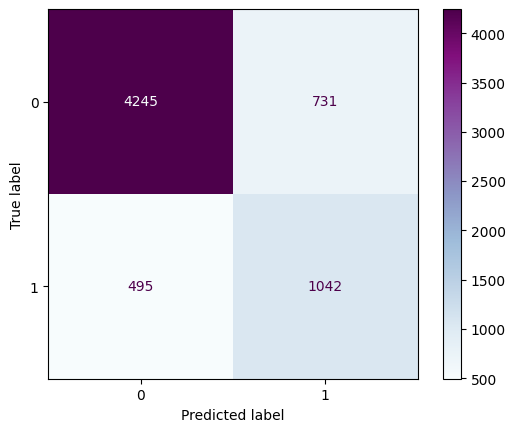

In [53]:
# Confusion Matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot(cmap='BuPu')
plt.show()

In [54]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Accuracy Score for KNN: {accuracy_knn:.2f}")
print(f"Precision Scorefor KNN: {precision_knn:.2f}")
print(f"Recallfor KNN: {recall_knn:.2f}")
print(f"F1 Scorefor KNN: {f1_knn:.2f}")

Accuracy Score for KNN: 0.81
Precision Scorefor KNN: 0.59
Recallfor KNN: 0.68
F1 Scorefor KNN: 0.63


- Decision Tree Plot

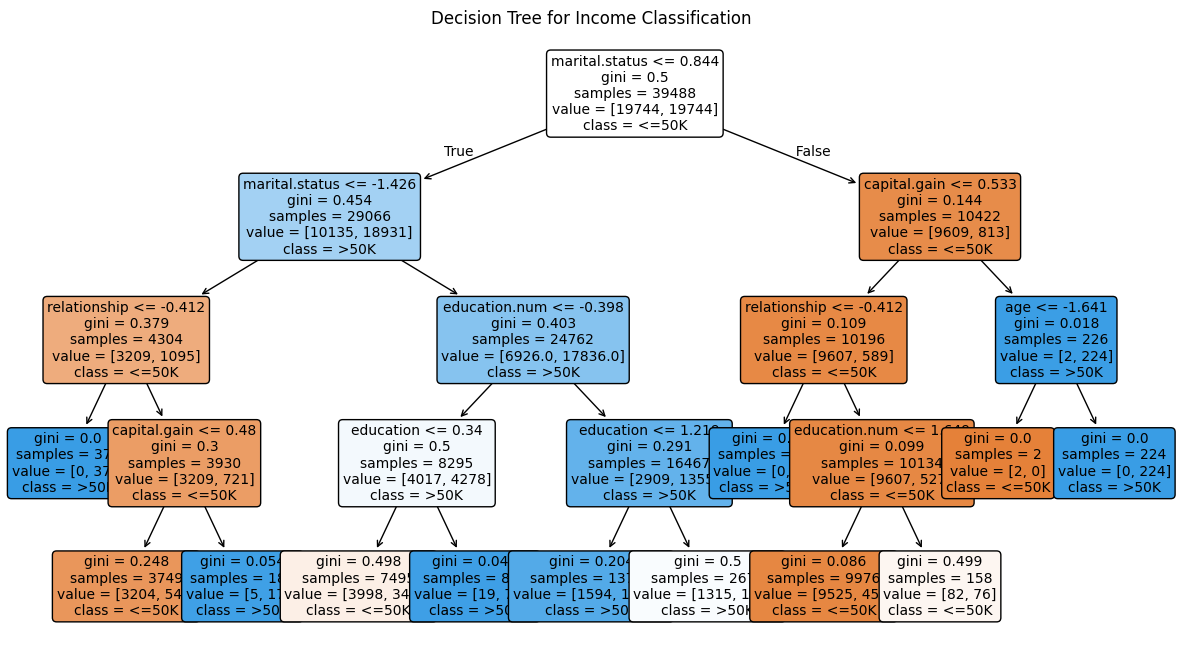

In [55]:
# Plot tree using plot_tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_scaled, y_train_smote)

plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True,
          rounded=True,
          impurity=True,
          fontsize=10)
plt.title("Decision Tree for Income Classification")
plt.show()

- Decision Tree

In [56]:
# Initialize the algorithm

dt = DecisionTreeClassifier()

# Fit the training data

dt.fit(X_train_scaled, y_train_smote)

# Check the training and testing accuracy for th model

accuracy_train_dt = dt.score(X_train_scaled, y_train_smote)
accuracy_test_dt = dt.score(X_test_scaled, y_test)

print(f"Decision Tree Training Accuracy: {accuracy_train_dt:.2f}")
print(f"Decision Tree Testing Accuracy: {accuracy_test_dt:.2f}")

Decision Tree Training Accuracy: 1.00
Decision Tree Testing Accuracy: 0.80


In [57]:
# Checking for cross validation

cv_scores_dt = cross_val_score(dt, X_train_scaled, y_train_smote, cv=5, n_jobs=-1)
print(f"Cross Validation Scores for Decision Tree : {cv_scores_dt}")
print(f"Mean Cross Validation Score for Decision Tree : {np.mean(cv_scores_dt):.2f}")

Cross Validation Scores for Decision Tree : [0.7623449  0.81261079 0.89832869 0.8878055  0.89540332]
Mean Cross Validation Score for Decision Tree : 0.85


In [58]:
# Predict test data

y_pred_dt = dt.predict(X_test_scaled)

# Calculate probablities

y_pred_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

print("\tClassification Report for Decision Tree")
print("-"*60)
print(classification_report(y_test, y_pred_dt))

	Classification Report for Decision Tree
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4976
           1       0.58      0.63      0.60      1537

    accuracy                           0.80      6513
   macro avg       0.73      0.74      0.73      6513
weighted avg       0.81      0.80      0.81      6513



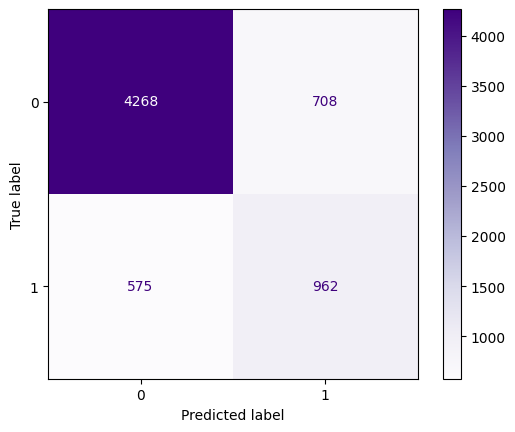

In [59]:
# Confusion Matrix for Decision Tree

cm_dt = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_)
disp.plot(cmap='Purples')
plt.show()


In [60]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)

print(f"Accuracy Score for Decision Tree: {accuracy_dt:.2f}")
print(f"Precision Score for Decision Tree: {precision_dt:.2f}")
print(f"Recall Score for Decision Tree: {recall_dt:.2f}")
print(f"F1 Score for Decision Tree: {f1_score_dt:.2f}")

Accuracy Score for Decision Tree: 0.80
Precision Score for Decision Tree: 0.58
Recall Score for Decision Tree: 0.63
F1 Score for Decision Tree: 0.60


- Random Forest Classifier

In [61]:
# Initialise the algorithm

rfc = RandomForestClassifier()

# Fit the training data

rfc.fit(X_train_scaled, y_train_smote)

# Check the training and testing accuracy

train_rfc_accuracy = rfc.score(X_train_scaled, y_train_smote)
test_rfc_accuracy = rfc.score(X_test_scaled, y_test)

print(f"Random Forest Training Accuracy: {train_rfc_accuracy:.2f}")
print(f"Random Forest Testing Accuracy: {test_rfc_accuracy:.2f}")

Random Forest Training Accuracy: 1.00
Random Forest Testing Accuracy: 0.84


In [62]:
# Checking for cross validation

cross_val_score_rfc = cross_val_score(rfc, X_train_scaled, y_train_smote, cv=10, n_jobs=-1)
print(f"Cross Validation Scores for Random Forest : {cross_val_score_rfc}")
print(f"Mean Cross Validation Score for Random Forest : {np.mean(cross_val_score_rfc):.2f}")

Cross Validation Scores for Random Forest : [0.80197518 0.8012155  0.80172195 0.91035705 0.94023803 0.94277032
 0.94150418 0.93162826 0.93287741 0.93161094]
Mean Cross Validation Score for Random Forest : 0.89


In [63]:
# Predict test data

y_pred_rfc = rfc.predict(X_test_scaled)

# Predict the probablities

y_pred_prob_rfc = rfc.predict_proba(X_test_scaled)[:,1]

print("\tClassification Report for Random Forest")
print("-"*60)
print(classification_report(y_test, y_pred_rfc))

	Classification Report for Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4976
           1       0.67      0.67      0.67      1537

    accuracy                           0.84      6513
   macro avg       0.78      0.78      0.78      6513
weighted avg       0.84      0.84      0.84      6513



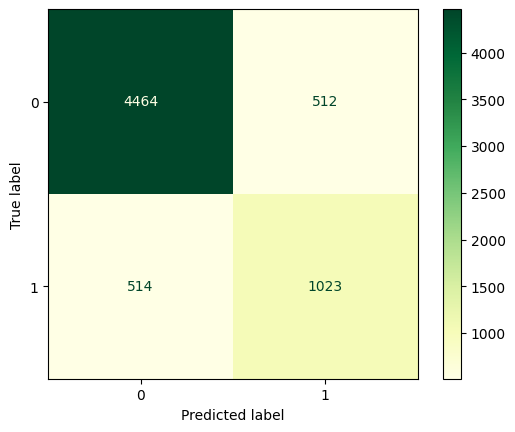

In [64]:
# Confusion Matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=rfc.classes_)
disp.plot(cmap='YlGn')
plt.show()

In [65]:
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)
precision_score_rfc = precision_score(y_test, y_pred_rfc)
recall_score_rfc = recall_score(y_test, y_pred_rfc)
f1_score_rfc = f1_score(y_test, y_pred_rfc)

print(f"Accuracy Score for Random Forest: {accuracy_score_rfc:.2f}")
print(f"Precision Score for Random Forest: {precision_score_rfc:.2f}")
print(f"Recall Score for Random Forest: {recall_score_rfc:.2f}")
print(f"F1 Score for Random Forest: {f1_score_rfc:.2f}")


Accuracy Score for Random Forest: 0.84
Precision Score for Random Forest: 0.67
Recall Score for Random Forest: 0.67
F1 Score for Random Forest: 0.67


- Support Vector Machine

In [66]:
svm = SVC(probability=True)

# Fit the model to training data

svm.fit(X_train_scaled, y_train_smote)

# Check the accuracy

train_accuracy_svm = svm.score(X_train_scaled, y_train_smote)
test_accuracy_svm = svm.score(X_test_scaled, y_test)

print(f"SVM Training Accuracy: {train_accuracy_svm:.2f}")
print(f"SVM Testing Accuracy: {test_accuracy_svm:.2f}")

SVM Training Accuracy: 0.87
SVM Testing Accuracy: 0.82


In [67]:
# Predict the test

y_pred_svm = svm.predict(X_test_scaled)

# Predict the probabilities

y_pred_prob_svm = svm.predict_proba(X_test_scaled)[:,1]

# Classification Report

print("\tClassification Report for SVM")
print("-"*60)
print(classification_report(y_test, y_pred_svm))

	Classification Report for SVM
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      4976
           1       0.59      0.77      0.67      1537

    accuracy                           0.82      6513
   macro avg       0.76      0.80      0.77      6513
weighted avg       0.84      0.82      0.83      6513



In [68]:
# Cross Validation

cross_val_score_svm = cross_val_score(svm, X_train_scaled, y_train_smote, cv=5, n_jobs=-1)
print(f"Cross Validation Scores for SVM : {cross_val_score_svm}")
print(f"Mean Cross Validation Score for SVM : {np.mean(cross_val_score_svm):.2f}")

Cross Validation Scores for SVM : [0.79197265 0.83514814 0.88224867 0.87729518 0.88020767]
Mean Cross Validation Score for SVM : 0.85


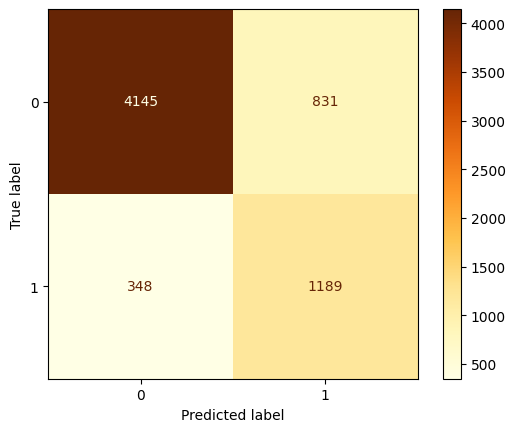

In [69]:
# Confusion Matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp.plot(cmap='YlOrBr')
plt.show()

In [70]:
# Presion and Recall score

accuracy_score_svm = accuracy_score(y_test, y_pred_svm)
precision_score_svm = precision_score(y_test, y_pred_svm)
recall_score_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)

print(f"Accuracy Score for SVM: {accuracy_score_svm:.2f}")
print(f"Precision Score for SVM: {precision_score_svm:.2f}")
print(f"Recall Score for SVM: {recall_score_svm:.2f}")
print(f"F1 Score for SVM: {f1_score_svm:.2f}")

Accuracy Score for SVM: 0.82
Precision Score for SVM: 0.59
Recall Score for SVM: 0.77
F1 Score for SVM: 0.67


- Naive Bayes

In [71]:
# Initialize the algorithm

nb = GaussianNB()

# Fit the model to training data

nb.fit(X_train_scaled, y_train_smote)

# Check the accuracy

train_accuracy_nb = nb.score(X_train_scaled, y_train_smote)
test_accuracy_nb = nb.score(X_test_scaled, y_test)

print(f"Naive Bayes Training Accuracy: {train_accuracy_nb:.2f}")
print(f"Naive Bayes Testing Accuracy: {test_accuracy_nb:.2f}")

Naive Bayes Training Accuracy: 0.78
Naive Bayes Testing Accuracy: 0.81


In [72]:
# Predict the y_test

y_pred_nb = nb.predict(X_test_scaled)

# Predict the probabilities

y_pred_prob_nb = nb.predict_proba(X_test_scaled)[:,1]

# Classification Report for Naives Bayes

print("\tClassification Report for Naive Bayes")
print("-"*60)
print(classification_report(y_test, y_pred_nb))

	Classification Report for Naive Bayes
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4976
           1       0.59      0.64      0.62      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.75      6513
weighted avg       0.82      0.81      0.81      6513



In [73]:
# Cross Validation

cross_val_score_nb = cross_val_score(nb, X_train_scaled, y_train_smote, cv=10, n_jobs=-1)
print(f"Cross Validation Scores for Naive Bayes : {cross_val_score_nb}")
print(f"Mean Cross Validation Score for Naive Bayes : {np.mean(cross_val_score_nb):.2f}")

Cross Validation Scores for Naive Bayes : [0.76880223 0.76424411 0.76753609 0.7791846  0.77766523 0.77817169
 0.78272981 0.77791846 0.77963526 0.78064843]
Mean Cross Validation Score for Naive Bayes : 0.78


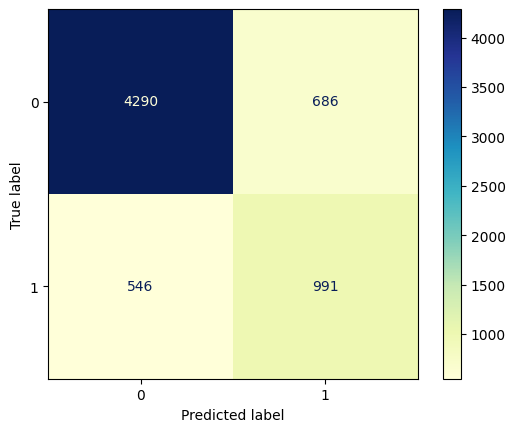

In [74]:
# Confusion Matrix

cm_nb = confusion_matrix(y_test, y_pred_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp.plot(cmap='YlGnBu')
plt.show()

In [75]:
# Precision Recall and F1 SCore

accuracy_score_nb = accuracy_score(y_test, y_pred_nb)
precision_score_nb = precision_score(y_test, y_pred_nb)
recall_score_nb = recall_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb)

print(f"Accuracy Score for Naive Bayes: {accuracy_score_nb:.2f}")
print(f"Precision Score for Naive Bayes: {precision_score_nb:.2f}")
print(f"Recall Score for Naive Bayes: {recall_score_nb:.2f}")

Accuracy Score for Naive Bayes: 0.81
Precision Score for Naive Bayes: 0.59
Recall Score for Naive Bayes: 0.64


# Model Evaluation

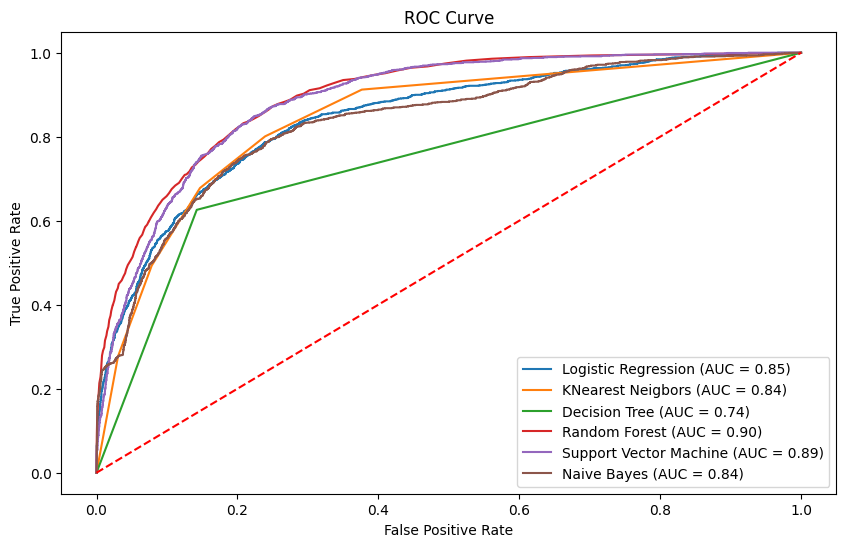

In [76]:
# Plot ROC Curve for all the models

auc_log_reg = roc_auc_score(y_test, y_pred_prob_log)
fpr_log, tpr_log, threshold_log = roc_curve(y_test, y_pred_prob_log)

auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, y_pred_prob_knn)

auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_prob_dt)

auc_rfc = roc_auc_score(y_test, y_pred_prob_rfc)
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, y_pred_prob_rfc)

auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_prob_svm)

auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_pred_prob_nb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNearest Neigbors (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {auc_rfc:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

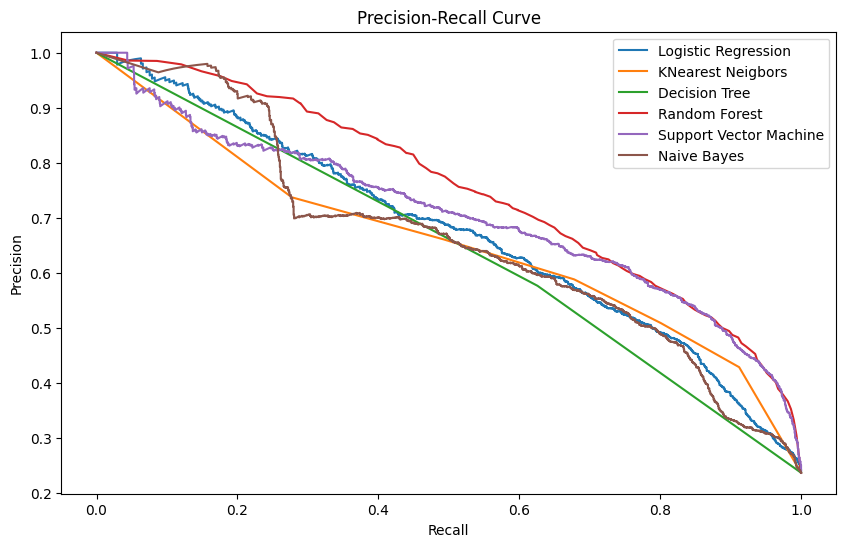

In [77]:
# Plot precision and recall

pres_log, recall_log, threshold_log = precision_recall_curve(y_test, y_pred_prob_log)
pres_knn, recall_knn, threshold_knn = precision_recall_curve(y_test, y_pred_prob_knn)
pres_dt, recall_dt, threshold_dt = precision_recall_curve(y_test, y_pred_prob_dt)
pres_rfc, recall_rfc, threshold_rfc = precision_recall_curve(y_test, y_pred_prob_rfc)
pres_svm, recall_svm, threshold_svm = precision_recall_curve(y_test, y_pred_prob_svm)
pres_nb, recall_nb, threshold_nb = precision_recall_curve(y_test, y_pred_prob_nb)

plt.figure(figsize=(10, 6))
plt.plot(recall_log, pres_log, label=f'Logistic Regression')
plt.plot(recall_knn, pres_knn, label=f'KNearest Neigbors')
plt.plot(recall_dt, pres_dt, label=f'Decision Tree')
plt.plot(recall_rfc, pres_rfc, label=f'Random Forest')
plt.plot(recall_svm, pres_svm, label=f'Support Vector Machine')
plt.plot(recall_nb, pres_nb, label=f'Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# Hyperparameter Tuning

- Logistic Regression - GridSearchCV

In [78]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Define the grid of hyperparameters to search

grid = dict()
grid['C'] = np.arange(0.1, 1.1, 0.1)

# Model

log_reg = LogisticRegression(random_state=42)

# Define the grid search procedure

grid_search_log = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# Execute the grid search

grid_result = grid_search_log.fit(X_train_scaled, y_train_smote)

# Best Score

best_score = grid_result.best_score_

# Best Parameters

best_params = grid_result.best_params_

print(f"Best Score for Logistic Regression using Grid Search: {best_score:.2f}")
print(f"Best Parameters for Logistic Regression using Grid Search: {best_params}")

# Best Model

best_model = grid_result.best_estimator_

# Predict on test set

y_pred_grid_log = best_model.predict(X_test_scaled)

Best Score for Logistic Regression using Grid Search: 0.82
Best Parameters for Logistic Regression using Grid Search: {'C': np.float64(0.1)}


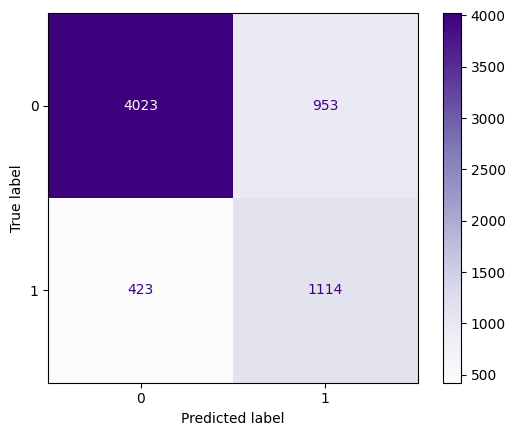

In [79]:
# Confusion Matrix

cm_grid_log = confusion_matrix(y_test, y_pred_grid_log)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid_log, display_labels=best_model.classes_)
disp.plot(cmap='Purples')

In [80]:
# Print Classification Report

print("\tClassification Report for Logistic Regression using Grid Search")
print("-"*60)
print(classification_report(y_test, y_pred_grid_log))

	Classification Report for Logistic Regression using Grid Search
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4976
           1       0.54      0.72      0.62      1537

    accuracy                           0.79      6513
   macro avg       0.72      0.77      0.74      6513
weighted avg       0.82      0.79      0.80      6513



- Using GridSearchCV with Cross-Validation to find optimal 'k'

In [81]:
param_grid = {'n_neighbors': np.arange(1, 21)}

# Initialize the model

knn = KNeighborsClassifier()

# Initialize GridSearchCV

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data

grid_results = grid_search_knn.fit(X_train_scaled, y_train_smote)

optimal_k = grid_results.best_params_['n_neighbors']

print(f"The optimal number of neighbors is {optimal_k}")

# Get the best score

best_score = grid_results.best_score_
print(f"The best cross-validated accuracy is {best_score:.2f}\n\n")

# Get the cross-validation results

cv_results = grid_results.cv_results_
print(f"Cross-validation results: {cv_results}")

# Best Estimator

best_model = grid_results.best_estimator_

print(f"The best estimator trained model: {best_model}")

# Best Params

best_params = grid_results.best_params_
print(f"The best parameters: {best_params}\n\n")

The optimal number of neighbors is 5
The best cross-validated accuracy is 0.85


Cross-validation results: {'mean_fit_time': array([0.07041268, 0.07097397, 0.07046432, 0.07061653, 0.07103896,
       0.07105193, 0.07015405, 0.07118573, 0.07126856, 0.069837  ,
       0.07010183, 0.07073154, 0.07049026, 0.07204328, 0.07172608,
       0.07057123, 0.0700664 , 0.07180958, 0.07184858, 0.07095242]), 'std_fit_time': array([0.00035419, 0.00096321, 0.00070736, 0.00038489, 0.00079868,
       0.00070441, 0.00065904, 0.00096475, 0.00121144, 0.00035407,
       0.00043254, 0.00039603, 0.00097162, 0.0015207 , 0.00089715,
       0.00060984, 0.00064521, 0.00252739, 0.00090287, 0.00043647]), 'mean_score_time': array([2.26318355, 2.8096787 , 3.09786649, 3.3085731 , 3.55747547,
       3.68313856, 3.78256407, 3.9204432 , 4.04005032, 4.18827434,
       4.14513783, 4.28041391, 4.39468408, 4.50345168, 4.63332763,
       4.59060817, 4.641471  , 4.7407515 , 4.79837823, 4.85952287]), 'std_score_time': array([0.159

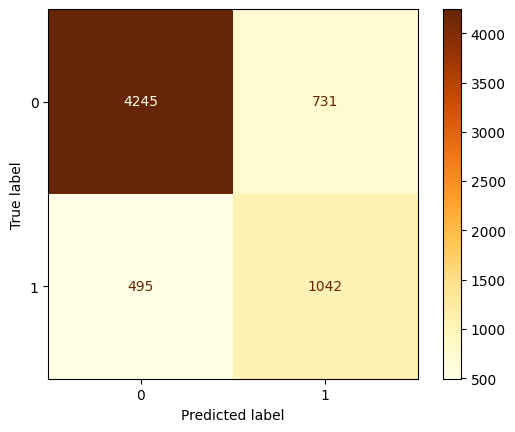

In [82]:
# Confusion Matrix

y_pred_grid_knn = best_model.predict(X_test_scaled)

cm_grid_knn = confusion_matrix(y_test, y_pred_grid_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid_knn, display_labels=best_model.classes_)
disp.plot(cmap='YlOrBr')
plt.show()

In [83]:
# Print Classification Report

print("\tClassification Report for KNN using Grid Search")
print("-"*60)
print(classification_report(y_test, y_pred_grid_knn))

	Classification Report for KNN using Grid Search
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4976
           1       0.59      0.68      0.63      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.77      0.75      6513
weighted avg       0.82      0.81      0.82      6513



- Decision Tree

In [84]:
# Initialize the model

dt = DecisionTreeClassifier(random_state=42)

# Set parameter grid for GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Create the GridSearch

grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearch to the data

dt_results = grid_search_dt.fit(X_train_scaled, y_train_smote)

# Best Param and Best SCore

best_param = dt_results.best_params_
best_score = dt_results.best_score_

print(f"Best Parameters for Decision Tree: {best_param}")
print(f"Best Score for Decision Tree: {best_score:.2f}")

# Best Model

best_model = dt_results.best_estimator_
print(f"The best model estimator is {best_model}.")
# Predict on test set

y_pred_grid_dt = best_model.predict(X_test_scaled)

Best Parameters for Decision Tree: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score for Decision Tree: 0.86
The best model estimator is DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42).


In [85]:
# Classification

print("\tClassification Report for Decision Tree using Grid Search")
print("-"*60)
print(classification_report(y_test, y_pred_grid_dt))

	Classification Report for Decision Tree using Grid Search
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4976
           1       0.65      0.66      0.66      1537

    accuracy                           0.84      6513
   macro avg       0.77      0.78      0.77      6513
weighted avg       0.84      0.84      0.84      6513



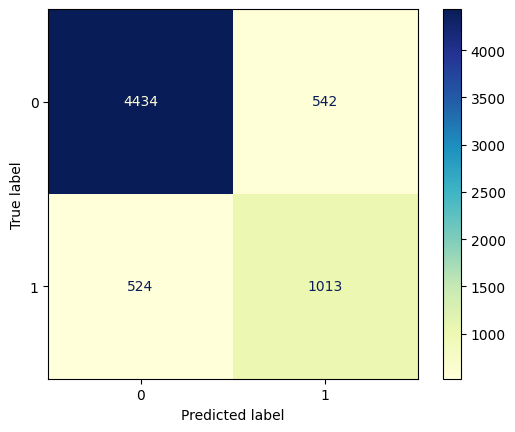

In [86]:
# Confusion Matrix

cm_grid_dt = confusion_matrix(y_test, y_pred_grid_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid_dt, display_labels=best_model.classes_)
disp.plot(cmap='YlGnBu')
plt.show()

- Support Vector Machines

In [87]:
# Support Vector Machine with Randomized Search

def train_svm_with_progress(X_train, y_train, param_distributions, n_iter=10, cv_splits=5, scoring='accuracy', n_jobs=-1, random_state=42):
    svm = SVC(probability=True, random_state=random_state) # Added random_state to SVC
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
    random_search_svm = RandomizedSearchCV(svm, param_distributions=param_distributions, n_iter=n_iter, cv=cv, scoring=scoring, n_jobs=n_jobs, random_state=random_state)

    total_iterations = n_iter * cv_splits  # Total number of fits

    start_time = time.time()
    with tqdm(total=total_iterations, desc="Training Support Vector Machine (Randomized Search)", unit="fold", unit_scale=True) as pbar:
        # Define a callback to update the progress bar
        def update_progress(*args):
            pbar.update(1)

        # Monkey-patch the fit method to include the callback
        original_fit = random_search_svm.fit
        def patched_fit(X, y, **kwargs):
            # we use Monkey patching because scikit-learn's RandomizedSearchCV does not provide a direct
            # callback parameter in its fit method
            for _ in range(total_iterations):
                update_progress()
            return original_fit(X, y, **kwargs)

        random_search_svm.fit = patched_fit
        random_search_svm.fit(X_train, y_train)

    elapsed_time = time.time() - start_time
    print(f"Training completed in {elapsed_time:.2f} seconds.")
    return random_search_svm

if 'X_train_scaled' in locals() and 'y_train_smote' in locals():
    param_distributions = {
        'C': [0.1, 1],
        'kernel': ['linear']
    }
    n_iter_search = 5  # Example: Number of parameter settings sampled

    svm_random_results = train_svm_with_progress(
        X_train_scaled,
        y_train_smote,
        param_distributions,
        n_iter=n_iter_search,
        cv_splits=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    # Best accuracy Score
    best_accuracy = svm_random_results.best_score_

    # Best Parameters
    best_params = svm_random_results.best_params_

    print(f"Best Accuracy Score for SVM: {best_accuracy:.2f}")
    print(f"Best Parameters for SVM: {best_params}")

    # Best Model
    best_model = svm_random_results.best_estimator_

    # Predict on test set
    if 'X_test_scaled' in locals():
        y_pred_random_svm = best_model.predict(X_test_scaled)
        # You can add further evaluation metrics here
    else:
        print("X_test_scaled not defined.")
else:
    print("X_train_scaled or y_train_smote not defined.")

Training Support Vector Machine (Randomized Search): 100%|██████████| 25.0/25.0 [12:48<00:00, 30.7s/fold]


Training completed in 768.40 seconds.
Best Accuracy Score for SVM: 0.82
Best Parameters for SVM: {'kernel': 'linear', 'C': 1}


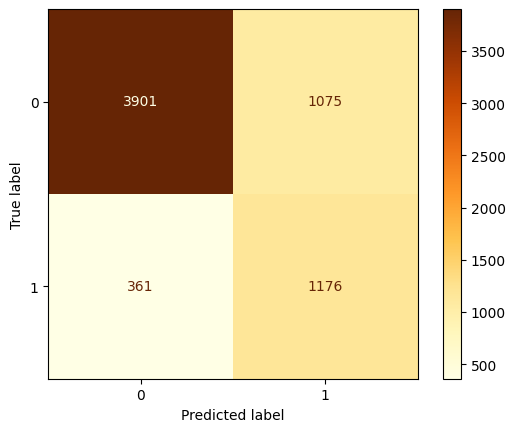

In [89]:
# Confusion Matrix

cm_grid_svm = confusion_matrix(y_test, y_pred_random_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid_svm, display_labels=best_model.classes_)
disp.plot(cmap='YlOrBr')
plt.show()

In [90]:
# Classification Report

print("\tClassification Report for SVM using Random Search")
print("-"*60)
print(classification_report(y_test, y_pred_random_svm))


	Classification Report for SVM using Random Search
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4976
           1       0.52      0.77      0.62      1537

    accuracy                           0.78      6513
   macro avg       0.72      0.77      0.73      6513
weighted avg       0.82      0.78      0.79      6513



- Naive Bayes

In [91]:
nb = GaussianNB()

# Set parameter grid for Naive Bayes

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# CV with StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Use StratifiedKFold for imbalanced dataset

# Create grid search

grid_search_nb = GridSearchCV(nb, param_grid, cv=cv, scoring='accuracy')

# Fit the GridSearch to the data

nb_results = grid_search_nb.fit(X_train_scaled, y_train_smote)

# Best SCore and best parameter

best_score = nb_results.best_score_
best_params = nb_results.best_params_

print(f"Best Score for Gaussian Naives Bayes: {best_score:.2f}")
print(f"Best Parameters for Gaussian Naives Bayes: {best_params}")

# Best Model

best_model = nb_results.best_estimator_

# Predict on test set

y_pred_grid_nb = best_model.predict(X_test_scaled)

Best Score for Gaussian Naives Bayes: 0.78
Best Parameters for Gaussian Naives Bayes: {'var_smoothing': 1e-09}


- Random Forest

In [106]:
# Parameter Grid

param_grid = {
    'n_estimators': [150, 250],
    'max_depth': [15, 25],
    'min_samples_split': [3],
    'min_samples_leaf': [5],
    'criterion': ['gini']
}

def train_random_forest_with_progress(X_train, y_train, param_grid, cv_splits=5, scoring='accuracy', n_jobs=-1, random_state=42):
    rfc = RandomForestClassifier(random_state=random_state)
    # Initialize StratifiedKFold outside the loop to avoid potential issues with pickling
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
    grid_search_rfc = GridSearchCV(rfc, param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs, verbose=0) # added n_jobs to GridSearchCV

    # Use list comprehension instead of multiple loops for efficiency
    total_iterations = len([
        (n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion)
        for n_estimators in param_grid.get('n_estimators', [1])
        for max_depth in param_grid.get('max_depth', [1])
        for min_samples_split in param_grid.get('min_samples_split', [1])
        for min_samples_leaf in param_grid.get('min_samples_leaf', [1])
        for criterion in param_grid.get('criterion', [1])
    ]) * cv_splits

    # Remove unnecessary start_time and elapsed_time calculations, as tqdm handles this

    with tqdm(total=total_iterations, desc="Training Random Forest (GridSearchCV)", unit="fold") as pbar:
        def update_pbar(params, model, score):
            pbar.update(1)

        # Added n_jobs to GridSearchCV
        grid_search_rfc = GridSearchCV(rfc, param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs, verbose=0)
        grid_search_rfc.fit(X_train, y_train)

    return grid_search_rfc

# Assuming X_train_scaled and y_train_smote are already defined
if 'X_train_scaled' in locals() and 'y_train_smote' in locals():
    # Train the Random Forest with progress bar
    rfc_results_with_progress = train_random_forest_with_progress(
        X_train_scaled,
        y_train_smote,
        param_grid,
        cv_splits=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )

    # Best Score and Best Param
    best_score = rfc_results_with_progress.best_score_
    best_params = rfc_results_with_progress.best_params_

    print(f"\nBest Score for Random Forest: {best_score:.2f}")
    print(f"Best Parameters for Random Forest: {best_params}")

    # Predict using grid
    y_pred_grid_rfc = rfc_results_with_progress.predict(X_test_scaled) # Assuming X_test_scaled is defined

    # Best Model
    best_model = rfc_results_with_progress.best_estimator_
else:
    print("X_train_scaled or y_train_smote not defined.")

Training Random Forest (GridSearchCV):   0%|          | 0/20 [00:36<?, ?fold/s]



Best Score for Random Forest: 0.89
Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 250}


In [ ]:
# Confusion Matrix

cm_grid_rfc = confusion_matrix(y_test, y_pred_grid_rfc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid_rfc, display_labels=best_model.classes_)
disp.plot(cmap='YlGnBu')
plt.show()

In [ ]:
# Classification Report

print("\tClassification Report for Random Forest using Grid Search")
print("-"*60)
print(classification_report(y_test, y_pred_grid_rfc))

- Compare the accuracy, f1_score, precision and recall for the hyperparameter tuned models

In [112]:
ht_log_accuracy = accuracy_score(y_test, y_pred_grid_log)
ht_knn_accuracy = accuracy_score(y_test, y_pred_grid_knn)
ht_dt_accuracy = accuracy_score(y_test, y_pred_grid_dt)
ht_svm_accuracy = accuracy_score(y_test, y_pred_random_svm)
ht_nb_accuracy = accuracy_score(y_test, y_pred_grid_nb)
ht_rfc_accuracy = accuracy_score(y_test, y_pred_grid_rfc)

ht_log_f1 = f1_score(y_test, y_pred_grid_log)
ht_knn_f1 = f1_score(y_test, y_pred_grid_knn)
ht_dt_f1 = f1_score(y_test, y_pred_grid_dt)
ht_svm_f1 = f1_score(y_test, y_pred_random_svm)
ht_nb_f1 = f1_score(y_test, y_pred_grid_nb)
ht_rfc_f1 = f1_score(y_test, y_pred_grid_rfc)

ht_log_pres = precision_score(y_test, y_pred_grid_log)
ht_dt_pres = precision_score(y_test, y_pred_grid_dt)
ht_knn_pres = precision_score(y_test, y_pred_grid_knn)
ht_svm_pres = precision_score(y_test, y_pred_random_svm)
ht_nb_pres = precision_score(y_test, y_pred_grid_nb)
ht_rfc_pres = precision_score(y_test, y_pred_grid_rfc)

ht_log_recall = recall_score(y_test, y_pred_grid_log)
ht_dt_recall = recall_score(y_test, y_pred_grid_dt)
ht_knn_recall = recall_score(y_test, y_pred_grid_knn)
ht_svm_recall = recall_score(y_test, y_pred_random_svm)
ht_nb_recall = recall_score(y_test, y_pred_grid_nb)
ht_rfc_recall = recall_score(y_test, y_pred_grid_rfc)

print(f"Accuracy for Logistic Regression: {ht_log_accuracy:.2f}")
print(f"Accuracy for KNN: {ht_knn_accuracy:.2f}")
print(f"Accuracy for Decision Tree: {ht_dt_accuracy:.2f}")
print(f"Accuracy for SVM: {ht_svm_accuracy:.2f}")
print(f"Accuracy for Naive Bayes: {ht_nb_accuracy:.2f}")
print(f"Accuracy for Random Forest: {ht_rfc_accuracy:.2f}\n")

print(f"F1 Score for Logistic Regression: {ht_log_f1:.2f}")
print(f"F1 Score for KNN: {ht_knn_f1:.2f}")
print(f"F1 Score for Decision Tree: {ht_dt_f1:.2f}")
print(f"F1 Score for SVM: {ht_svm_f1:.2f}")
print(f"F1 Score for Naive Bayes: {ht_nb_f1:.2f}")
print(f"F1 Score for Random Forest: {ht_rfc_f1:.2f}\n")

print(f"Precision for Logistic Regression: {ht_log_pres:.2f}")
print(f"Precision for KNN: {ht_knn_pres:.2f}")
print(f"Precision for Decision Tree: {ht_dt_pres:.2f}")
print(f"Precision for SVM: {ht_svm_pres:.2f}")
print(f"Precision for Naive Bayes: {ht_nb_pres:.2f}")
print(f"Precision for Random Forest: {ht_rfc_pres:.2f}\n")

print(f"Recall for Logistic Regression: {ht_log_recall:.2f}")
print(f"Recall for KNN: {ht_knn_recall:.2f}")
print(f"Recall for Decision Tree: {ht_dt_recall:.2f}")
print(f"Recall for SVM: {ht_svm_recall:.2f}")
print(f"Recall for Naive Bayes: {ht_nb_recall:.2f}")
print(f"Recall for Random Forest: {ht_rfc_recall:.2f}")

Accuracy for Logistic Regression: 0.79
Accuracy for KNN: 0.81
Accuracy for Decision Tree: 0.84
Accuracy for SVM: 0.78
Accuracy for Naive Bayes: 0.81
Accuracy for Random Forest: 0.85

F1 Score for Logistic Regression: 0.62
F1 Score for KNN: 0.63
F1 Score for Decision Tree: 0.66
F1 Score for SVM: 0.62
F1 Score for Naive Bayes: 0.62
F1 Score for Random Forest: 0.69

Precision for Logistic Regression: 0.54
Precision for KNN: 0.59
Precision for Decision Tree: 0.65
Precision for SVM: 0.52
Precision for Naive Bayes: 0.59
Precision for Random Forest: 0.68

Recall for Logistic Regression: 0.72
Recall for KNN: 0.68
Recall for Decision Tree: 0.66
Recall for SVM: 0.77
Recall for Naive Bayes: 0.64
Recall for Random Forest: 0.70


# Save Model

In [113]:
# Save the best model using pickle

filename = 'RandomForest_Model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(best_model, file)

# Conclusion

- After exploring a plethora of training algorithms Random Forest gave us the best score therefore it was saved.